In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [510]:
df = pd.read_csv('../Telco-Customer-Churn.csv')

In [511]:
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [513]:
df['PaymentMethod'].value_counts()
# PaperlessBilling  7043 non-null   int64  
#PaymentMethod   

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [515]:
# search for null/missing values result ->no null values found
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [516]:
# check for duplicates  -> result no duplicates
df.duplicated().sum()

0

In [517]:
# we don't need the customer ID, so its best to drop it
df.drop(columns=['customerID'],inplace=True)

In [518]:
# Convert 'TotalCharges' column into float64

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [519]:
# there are nan values in TotalCharges
df.fillna(df['TotalCharges'].mean(),inplace=True)

In [520]:
# now we have checked for null and duplicated, now lets go for EDA for each column
# extract numerical and categorical columns
numrc = []
catc = []

for col in df.columns:
    if df[col].dtype=='object':
        catc.append(col)
    elif df[col].dtype!='object':
        numrc.append(col)


### Data Visualization
>  Do univariate analysis on each feature, check for gender,Churn distribution
>  

<Axes: xlabel='gender', ylabel='count'>

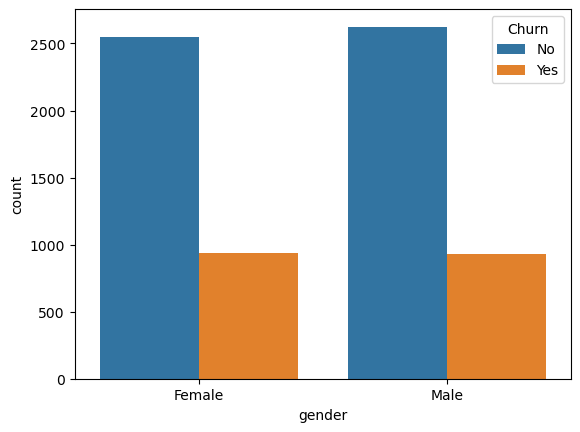

In [521]:
sns.countplot(data=df,x='gender',hue='Churn')
# gender selection doesnot necessarily determines churn -> Each of the features are equally important

In [522]:
df.groupby(['SeniorCitizen'])['Churn'].value_counts()
# for each of the senior citizen =1 , there is almost equal tendencies for customers churning
# however it's different for SeniorCitizen = 0
#sns.countplot(data=df,x='SeniorCitizen',hue='Churn')

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23fc86f2bc0>,
 [Text(0.6029179609935148, 0.920048874957968, "(0, 'Female', 'No')"),
  Text(-0.7272994566898492, 0.8252487505586728, "(0, 'Female', 'Yes')"),
  Text(-0.9738963986431363, -0.5113959373224718, "(0, 'Male', 'No')"),
  Text(0.2640716349910733, -1.0678324641970487, "(0, 'Male', 'Yes')"),
  Text(0.707212486849669, -0.8425262597948548, "(1, 'Female', 'No')"),
  Text(0.8958221645096082, -0.6383593420428032, "(1, 'Female', 'Yes')"),
  Text(1.0289788795088581, -0.38884761221421305, "(1, 'Male', 'No')"),
  Text(1.0939106603076978, -0.11558316168532964, "(1, 'Male', 'Yes')")],
 [Text(0.328864342360099, 0.5018448408861643, '31.53%'),
  Text(-0.3967087945580995, 0.45013568212291233, '9.92%'),
  Text(-0.5312162174417107, -0.27894323853953, '32.47%'),
  Text(0.1440390736314945, -0.5824540713802083, '9.85%'),
  Text(0.38575226555436487, -0.45955977806992077, '4.66%'),
  Text(0.4886302715506953, -0.3481960047506199, '3.41%'),
  Text(0.5612612070048316, -0.

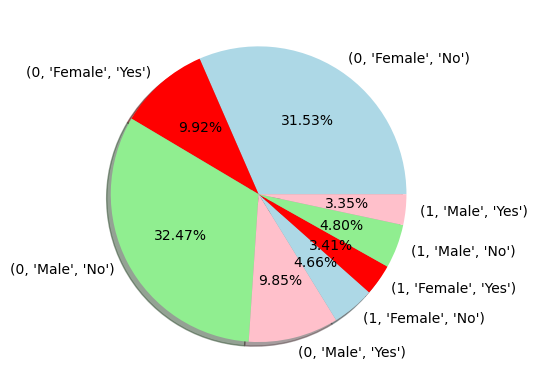

In [523]:
# Check for the distribution of SeniorCitizen vs gender

churn_gender = df.groupby(['SeniorCitizen','gender'])['Churn'].value_counts()
#churn_label_count = df["Churn"].value_counts()
plt.pie(
    churn_gender,
    autopct="%.2f%%",
    labels=churn_gender.index,
    colors=["lightblue", "red","lightgreen","pink"],
    shadow=True,
)

In [524]:
# for each of the numerical column, make a distribution plot and a bar/hist/count plot

def make_plot(col):
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    
    sns.kdeplot(data=df,x=col,hue='Churn')
    plt.title(f"{col} vs Churn distribution", pad=10, fontsize=10, fontweight=20)
    
    plt.subplot(1,2,2)
    ax=sns.barplot(data=df, y=col, x='Churn', estimator=np.mean)
    plt.title(f" Average {col} vs churn", pad=10, fontsize=10, fontweight=20)
    
    
    plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

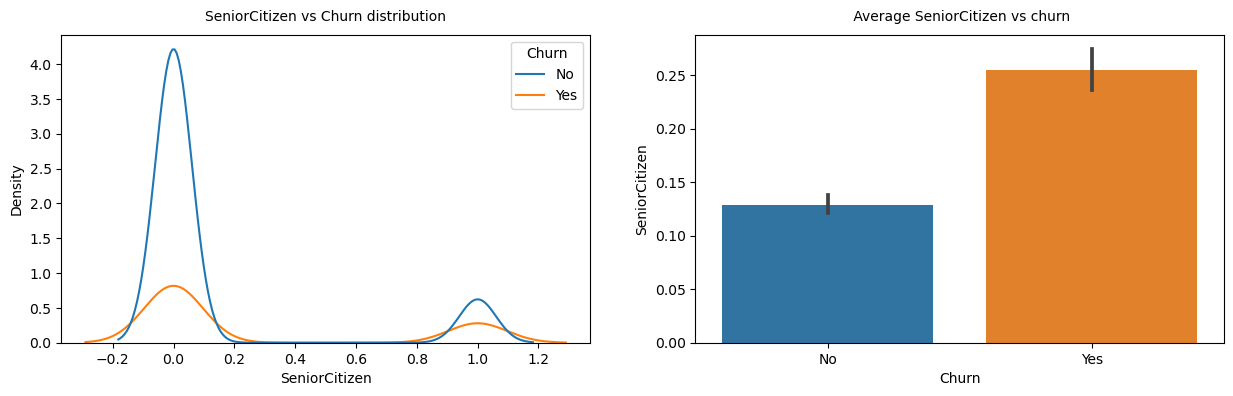

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

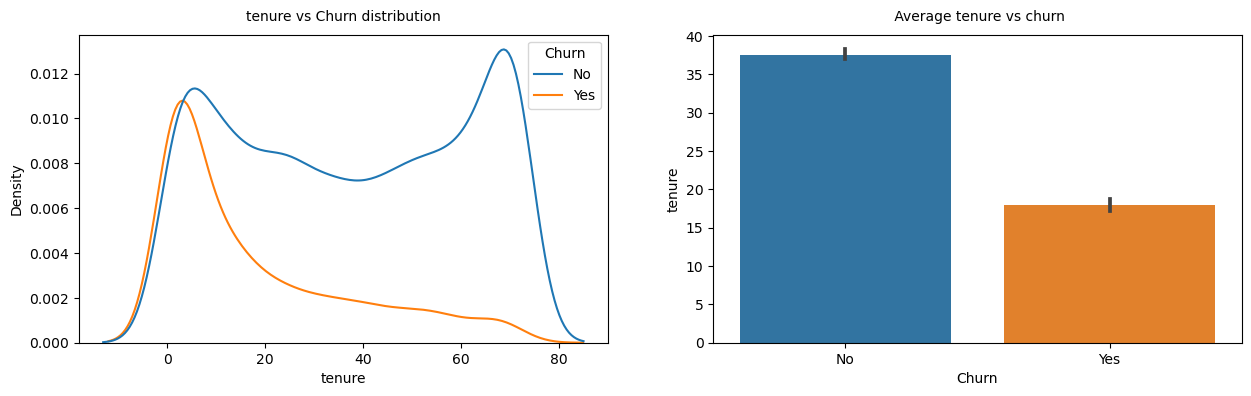

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

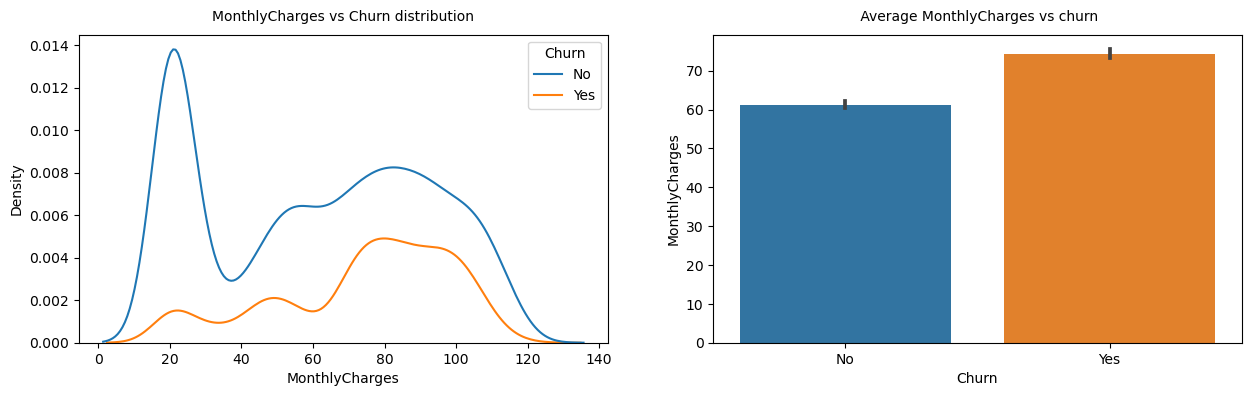

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

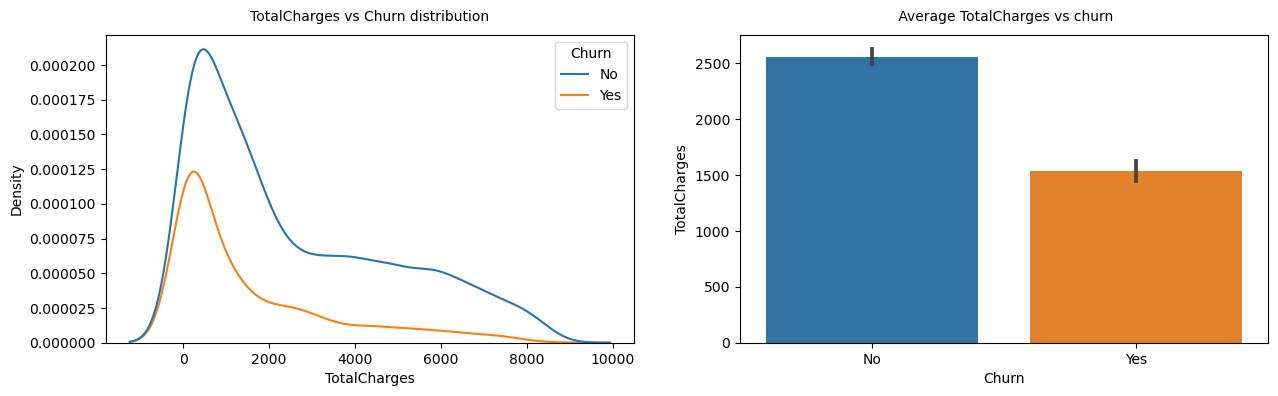

In [525]:
for i in numrc:
    make_plot(i)

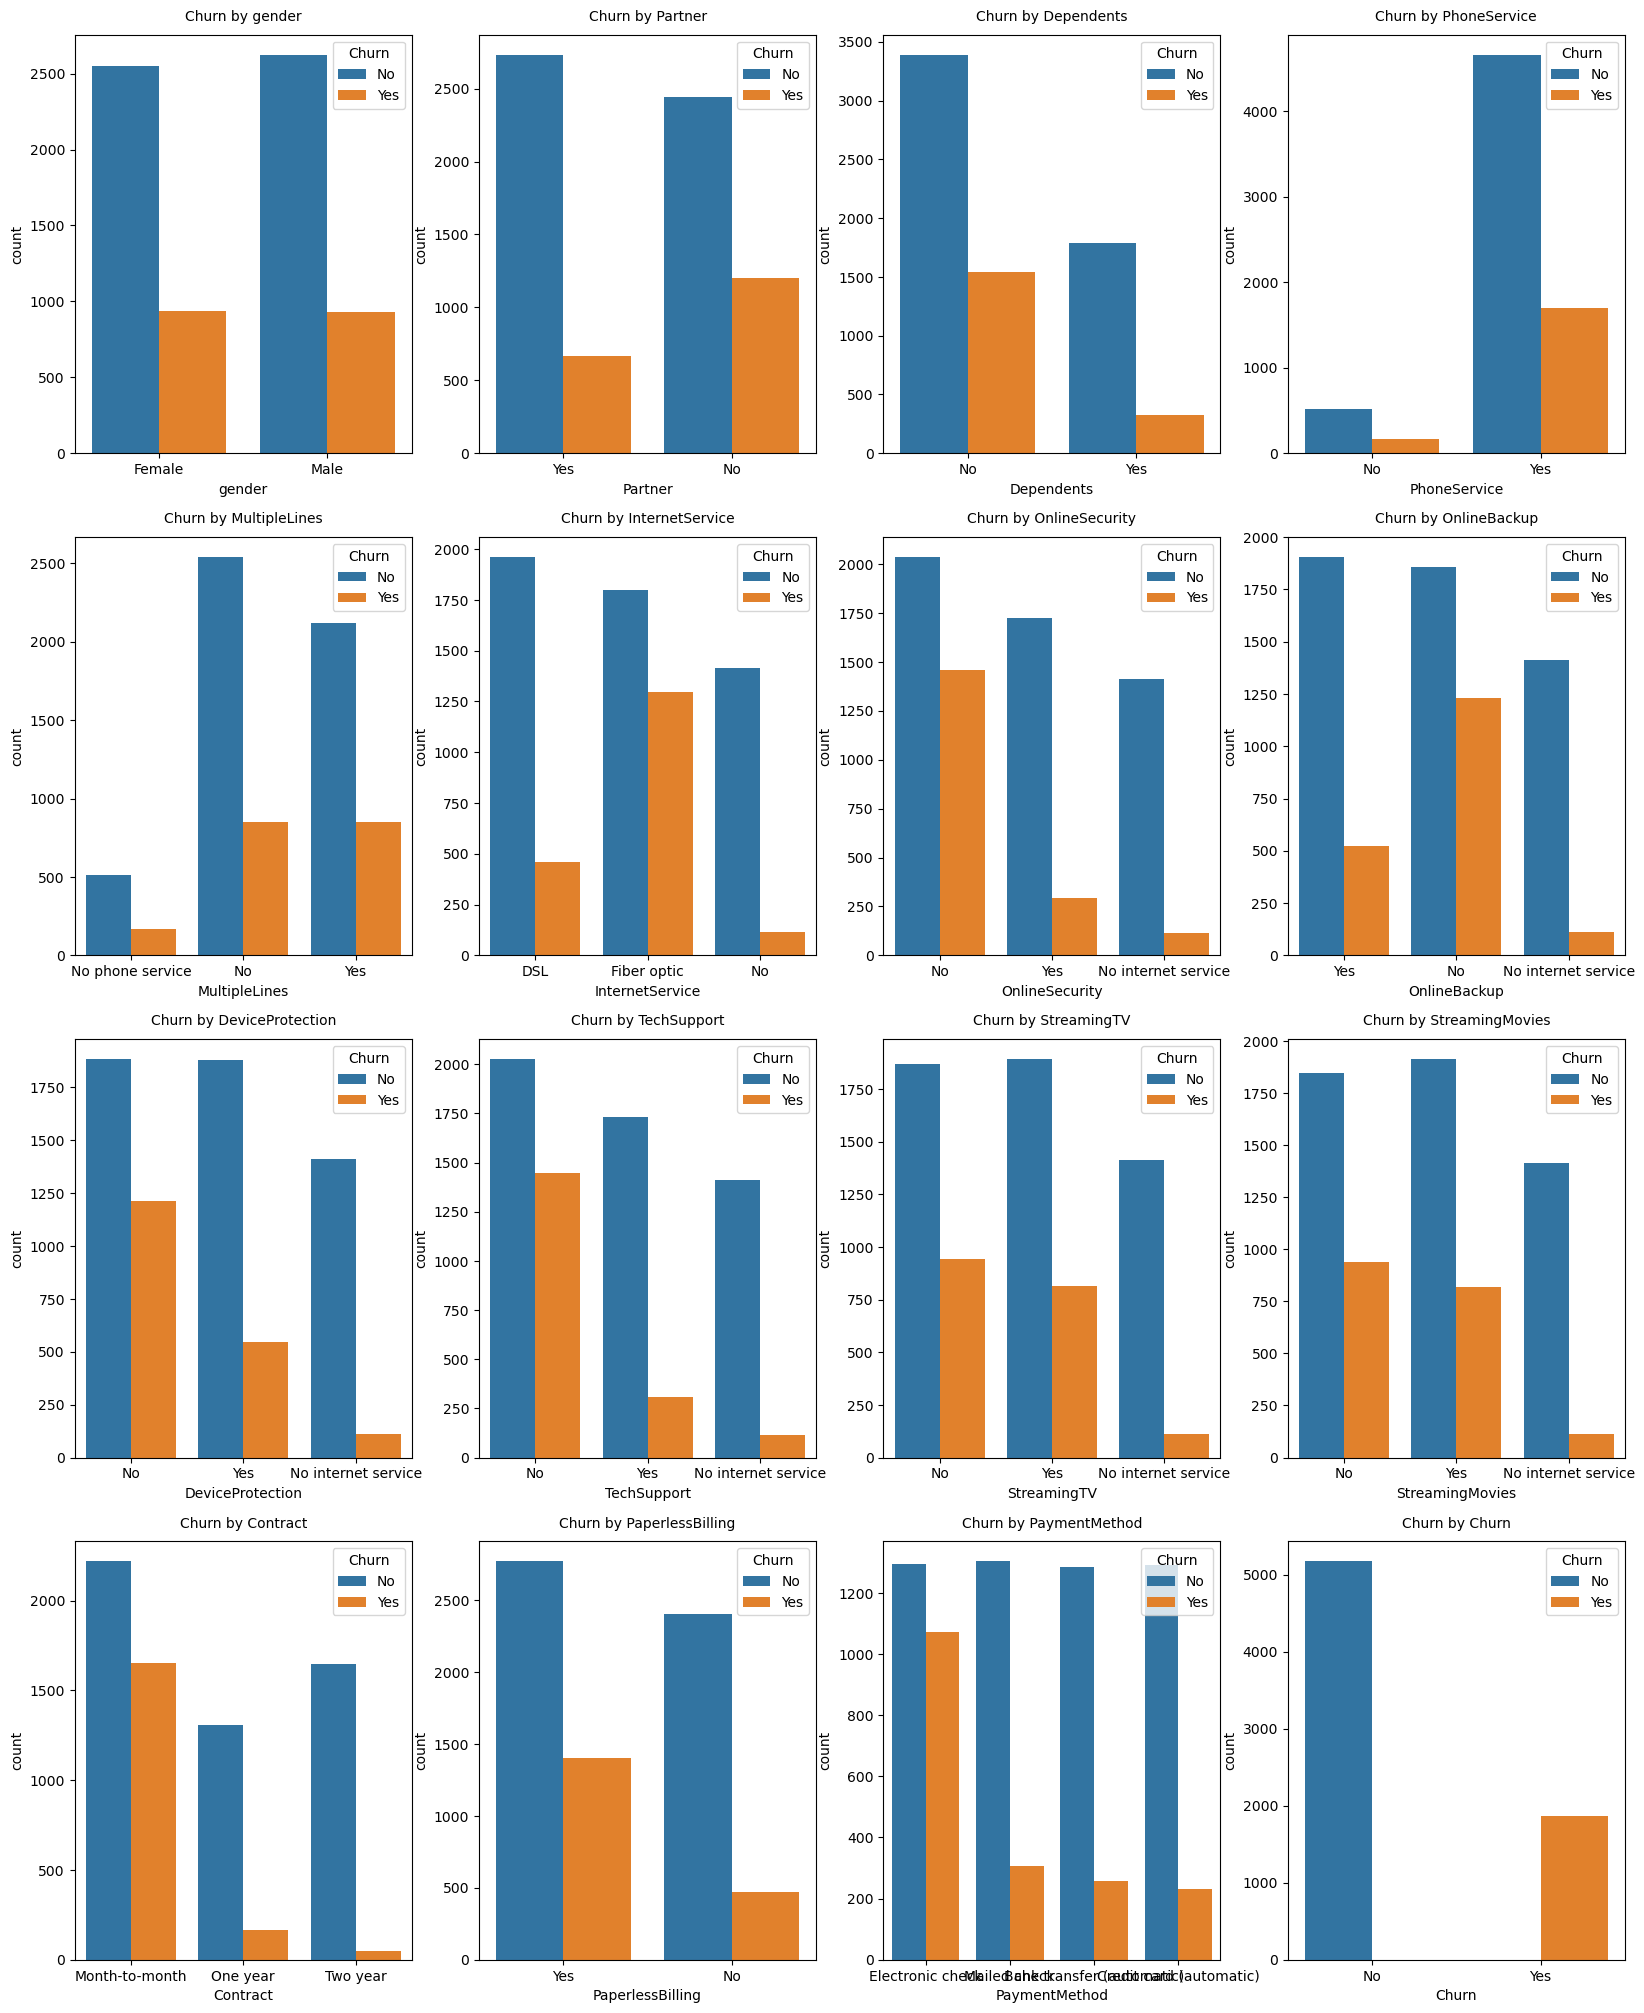

In [526]:
# Analysis of categorical features
# 
x=1
plt.figure(figsize=(20,25))
# fig, axes = plt.subplots(4, 4, figsize=(20, 18), dpi=500)
for col in catc:
    plt.subplot(len(catc)//4,len(catc)//4,x)
    ax=sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn by {col}", pad=10, fontsize=10, fontweight=20)
    x+=1


### EDA

In [528]:
# convert the target column to numericak to 0 or 1
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Churn'] = lb.fit_transform(df['Churn'])

#### EDA

1. Gender -> is it biased/unbiased and do univariate analysis,
2. The features which have 'Yes' or 'No' can be mapped to 1 or 0,

In [529]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [530]:
df['TotalCharges'].max()

8684.8

In [531]:
for i in df.columns:
    print('{col}:'.format(col=i),'and its counts',df[i].value_counts(dropna=False))

gender: and its counts gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen: and its counts SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner: and its counts Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents: and its counts Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure: and its counts tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService: and its counts PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines: and its counts MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService: and its counts InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity: and its counts OnlineSecurity
No                     3498
Yes                    2019
No 

In [555]:
df['PaymentMethod'].value_counts().to_dict()

{2: 2365, 3: 1612, 0: 1544, 1: 1522}

In [496]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [497]:
type(df['SeniorCitizen'][0])

numpy.int64

In [498]:
numrc[1:],catc

(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'])

In [400]:
# use a column Transfer to convert categoricalcols
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#cat_cols=df.select_dtypes('object').columns
#num_cols=[col1 for col1 in df.columns if col1 not in cat_cols]

preprocessor= ColumnTransformer([
    ('num', StandardScaler(), numrc),
    ('cat', LabelEncoder(),catc)
],
remainder='passthrough')


In [532]:
# in  the categorical columns, all the columns with binary features shall be converted to 0 or 1
bin_c = []

for i in catc:
    if len(df[i].value_counts())==2:
        bin_c.append(i)
        


In [533]:
bin_c

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [541]:
# for each of the bin_c map 'Yes' to 1 and 'No' to 0
for i in bin_c[1:-1]:
    df[i] = df[i].map({'No':0,'Yes':1})

In [534]:
df['gender'] = df['gender'].map({'Female':0,'Male':1})

In [535]:
# now convert the columns with more than 2 values , first find them out

mult_c = []
for i in catc:
    if i not in bin_c:
        mult_c.append(i)

In [536]:
mult_c

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [537]:
df[mult_c]

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [538]:
from sklearn.preprocessing import LabelEncoder

new_df = pd.DataFrame()
le = LabelEncoder()
for i in mult_c:
    df[i] = le.fit_transform(df[i])

In [539]:
# the entire data is now converted in 'int' format, and it can be loaded into ML model

In [542]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [543]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [411]:
# use a column Transfer to convert categoricalcols
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#cat_cols=df.select_dtypes('object').columns
#num_cols=[col1 for col1 in df.columns if col1 not in cat_cols]

preprocessor= ColumnTransformer([
    ('cat', LabelEncoder(),catc),
    ('num', StandardScaler(), numrc)
])

#fit and transform the data using the processing pipeline


#converting to dataframe
#df_processed=pd.DataFrame(df_processed, columns=df.columns)

In [545]:
df['Partner'].value_counts().to_dict()

{0: 3641, 1: 3402}

In [333]:
# you can export the preprocessed data for model making

df.to_csv('processed.csv')

In [70]:
pattern = '(\d+\.*\d*)+'
text_ = '87.76'

ls = ['abc','zia','34.2','12.1','wsa','1','qwwe','12']
res = []
for text in ls:
    if re.match(pattern,text):
        res.append(text)
        
print(res)

['34.2', '12.1', '1', '12']


In [23]:
## Aggregrate functions - sum,min,max,avg,count,unique,nunique,nlargest,nsmallest,agg
## 
# df[['gender','tenure']].head(5).to_dict()
# it returns a dict 

{'gender': {0: 'Female', 1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'},
 'tenure': {0: 1, 1: 34, 2: 2, 3: 45, 4: 2}}

In [435]:
ss = StandardScaler()
res = ss.fit_transform(np.array([28,1200,1345]).reshape(3,1))
inputs = list(res.reshape(3,))

In [437]:
inputs

[-1.4070687381311469, 0.5805783825073073, 0.8264903556238397, 0, 1, 0, 1, 1]